In [6]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import peptides
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn. model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import std
import pandas as pd
import numpy as np
import re
from sklearn.inspection import permutation_importance

In [7]:
def model(bacteria):
    global Model
    global Data
    global scaler
    if bacteria=='Staphylococcus aureus':
        Data=pd.read_csv(r'C:\Users\Elina\Desktop\Polymers\Staf_a.csv')
    elif bacteria=='Methicillin-Resistant Staphylococcus aureus':
        Data=pd.read_csv(r'C:\Users\Elina\Desktop\Polymers\MRSA.csv')
    elif bacteria=='Bacillus subtilis':
        Data=pd.read_csv(r'C:\Users\Elina\Desktop\Polymers\Bacillus_s.csv')
    elif bacteria=='Escherichia coli':
        Data=pd.read_csv(r'C:\Users\Elina\Desktop\Polymers\Escherichia_c.csv')
    elif bacteria=='Salmonella typhimurium':
        Data=pd.read_csv(r'C:\Users\Elina\Desktop\Polymers\Salmonella_typh.csv')
    elif bacteria=='Klebsiella pneumoniae':
        Data=pd.read_csv(r'C:\Users\Elina\Desktop\Polymers\Klebsiella_p.csv')
        
    Data=Data.sample(frac=1)
    X = Data.drop(bacteria, axis = 1) # Dropping our target column
    y = Data[bacteria] # Extracting the column
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42) # Splitting our data into test and training set, where 80% of data goes to training and 20% to test (test_size). RNG seed 42 is given as argument to ensure reproducibility.
    scaler = MinMaxScaler() #Instantiating scaler to prepare our final data to use during model development
    X_train = scaler.fit_transform(X_train_raw) # fitting the scaler and transforming our train data using .fit_transform
    X_test = scaler.transform(X_test_raw) #Using .transform to scale our test data with the settings obtained from fitting the training data 
    
    params = {'C': [0.5, 1, 10, 20], 
              'gamma': [1, 0.75, 0.5, 0.25], 
              'kernel': ['poly','sigmoid','rbf']} 
    clf = GridSearchCV(
        estimator=SVC(),
        param_grid=params,
        cv=5,
        n_jobs=5,
        verbose=1)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    
    Model = SVC(kernel=dict(clf.best_params_)['kernel'], degree=3, gamma=dict(clf.best_params_)['gamma'], C=dict(clf.best_params_)['C'])
    Model.fit(X_train, y_train)
    y_pred = Model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')# fmt='d' formats the numbers as digits, which means integers
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    print(classification_report(y_test,y_pred))
    return Model

def peptides_classifier(bacteria, peptide_seq):
    pep = pd.DataFrame([peptides.Peptide(pept).descriptors() for pept in peptide_seq])
    if bacteria=='Staphylococcus aureus':
        pep=pep[['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F4', 'F5', 'F6', 'KF2', 'KF3', 'KF5', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2', 'E1', 'E2', 'E4', 'PD1', 'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'SV2', 'SV4', 'ST1', 'ST2', 'ST3', 'ST5', 'ST6', 'ST7', 'ST8', 'SVGER2', 'SVGER3', 'SVGER4', 'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER11', 'T1', 'T3', 'T4', 'T5', 'VHSE3', 'VHSE4', 'VHSE7', 'Z5']]
    elif bacteria=='Methicillin-Resistant Staphylococcus aureus':
        pep=pep[['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F4', 'F5', 'F6', 'KF3', 'KF4', 'KF5', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2', 'E1', 'PD2', 'ProtFP1', 'ProtFP3', 'ProtFP4', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'SV3', 'ST2', 'ST3', 'ST5', 'ST7', 'ST8', 'SVGER1', 'SVGER2', 'SVGER3', 'SVGER4', 'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER10', 'SVGER11', 'T1', 'T3', 'T4', 'T5', 'VHSE2', 'VHSE4', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1', 'Z2']]
    elif bacteria=='Bacillus subtilis':
        pep=pep[['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF1', 'KF2', 'KF3', 'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2', 'MSWHIM3', 'E2', 'E3', 'PD1', 'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'SV1', 'SV3', 'SV4', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'SVGER2', 'SVGER3', 'SVGER4', 'SVGER5', 'SVGER6', 'SVGER8', 'SVGER9', 'SVGER11', 'T1', 'T4', 'T5', 'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE7', 'Z2', 'Z4', 'Z5']]
    elif bacteria=='Escherichia coli':
        pep=pep[['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF2', 'KF3', 'KF5', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM2', 'MSWHIM3', 'E3', 'E4', 'PD1', 'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'SV1', 'SV2', 'SV3', 'SV4', 'ST1', 'ST3', 'ST5', 'ST7', 'ST8', 'SVGER1', 'SVGER2', 'SVGER3', 'SVGER4', 'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER10', 'SVGER11', 'T1', 'T2', 'T3', 'T4', 'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE7', 'Z1', 'Z2', 'Z4', 'Z5']]    
    elif bacteria=='Salmonella typhimurium':
        pep=pep[['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF2', 'KF3', 'KF5', 'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2', 'MSWHIM3', 'E1', 'E2', 'E3', 'E4', 'PD1', 'ProtFP1', 'ProtFP2', 'ProtFP4', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'SV3', 'ST1', 'ST2', 'ST3', 'ST5', 'ST7', 'ST8', 'SVGER1', 'SVGER2', 'SVGER3', 'SVGER4', 'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER11', 'T1', 'T2', 'VHSE3', 'VHSE5', 'VHSE7', 'Z1', 'Z4', 'Z5']]
    elif bacteria=='Klebsiella pneumoniae':
        pep=pep[['BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'PP1', 'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'KF3', 'KF4', 'KF5', 'KF7', 'KF8', 'KF9', 'KF10', 'MSWHIM1', 'MSWHIM2', 'E1', 'PD2', 'ProtFP1', 'ProtFP3', 'ProtFP4', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'SV2', 'SV3', 'ST2', 'ST3', 'ST4', 'ST5', 'ST7', 'ST8', 'SVGER1', 'SVGER2', 'SVGER3', 'SVGER4', 'SVGER5', 'SVGER6', 'SVGER7', 'SVGER8', 'SVGER9', 'SVGER11', 'T3', 'T4', 'VHSE1', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'Z1', 'Z2', 'Z3', 'Z4']]
    Peptides = scaler.transform(pep) 
    pep.insert (loc= 0 , column=bacteria, value='')
    pep.insert (loc= 0 , column='Sequence', value='')
    result=Model.predict(Peptides)
    i=0
    while i<len(peptide_seq):
        pep.loc[i, [bacteria]]=result[i]
        pep.loc[i, ['Sequence']]=peptide_seq[i]
        i=i+1
    return pep

In [8]:
#bacteria='Staphylococcus aureus'
#bacteria='Methicillin-Resistant Staphylococcus aureus'
#bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
bacteria='Klebsiella pneumoniae'

In [9]:
peptide_seq= ['GAPRGCWTKSYPPQPCF','GALRGCWTKSYPPQPCF', 'FLQRIIGALGRLF','FLQRIIGAWGRLF']

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 10, 'gamma': 0.75, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        70
           1       0.85      0.72      0.78        76

    accuracy                           0.79       146
   macro avg       0.79      0.79      0.79       146
weighted avg       0.80      0.79      0.79       146



SVC(C=10, gamma=0.75)

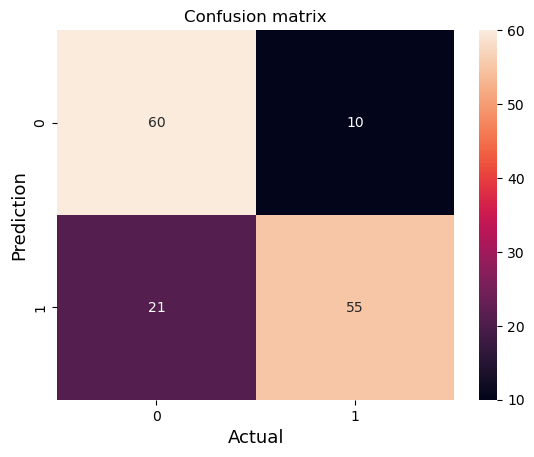

In [5]:
model(bacteria)

In [6]:
#Test
peptides_classifier(bacteria, peptide_seq)

,Sequence,Staphylococcus aureus,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,...,SVGER9,SVGER11,T1,T3,T4,T5,VHSE3,VHSE4,VHSE7,Z5
0,GAPRGCWTKSYPPQPCF,0,0.180588,-0.071765,0.410588,-0.222941,0.006471,-0.377647,0.283529,-0.102941,...,0.112882,0.791229,-4.467059,-0.223529,-0.142941,0.636471,-0.300588,0.323529,-0.094118,0.037059
1,GALRGCWTKSYPPQPCF,0,0.045882,-0.082353,0.336471,-0.181765,0.081176,-0.238824,0.240000,-0.073529,...,-0.073700,0.729753,-4.424118,-0.221176,-0.036471,0.654706,-0.250000,0.273529,-0.078235,-0.031176
2,FLQRIIGALGRLF,1,-0.423077,-0.209231,-0.260000,-0.020769,-0.000769,0.388462,0.306923,0.253846,...,-1.058985,0.675692,-4.117692,-0.360000,0.460000,0.594615,-0.026923,0.001538,0.310769,0.204615
3,FLQRIIGAWGRLF,1,-0.436154,0.032308,-0.102308,-0.131538,0.006154,0.380769,0.256923,0.211538,...,-0.947808,0.570277,-3.340000,-0.327692,0.197692,0.551538,0.083077,0.120769,0.226923,0.017692


In [10]:
bacteria='Staphylococcus aureus'
#bacteria='Methicillin-Resistant Staphylococcus aureus'
#bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 20, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       224
           1       0.71      0.70      0.70       196

    accuracy                           0.73       420
   macro avg       0.72      0.72      0.72       420
weighted avg       0.73      0.73      0.73       420



SVC(C=20, gamma=1)

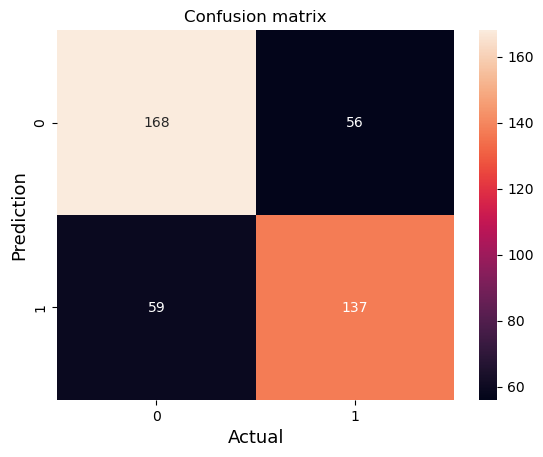

In [11]:
model(bacteria)

In [12]:
#bacteria='Staphylococcus aureus'
bacteria='Methicillin-Resistant Staphylococcus aureus'
#bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 20, 'gamma': 0.5, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        52
         1.0       0.76      0.76      0.76        51

    accuracy                           0.77       103
   macro avg       0.77      0.77      0.77       103
weighted avg       0.77      0.77      0.77       103



SVC(C=20, gamma=0.5)

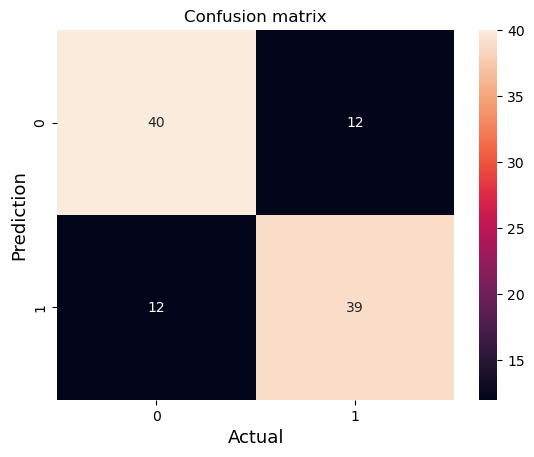

In [14]:
model(bacteria)

In [15]:
#bacteria='Staphylococcus aureus'
#bacteria='Methicillin-Resistant Staphylococcus aureus'
bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 20, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       128
           1       0.79      0.75      0.77       152

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.75       280
weighted avg       0.76      0.75      0.75       280



SVC(C=20, gamma=1)

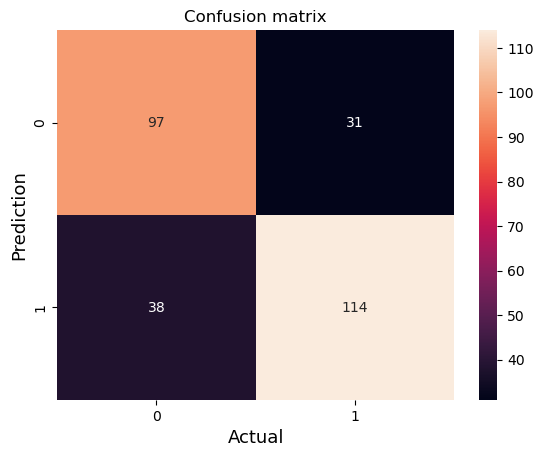

In [16]:
model(bacteria)

In [17]:
#bacteria='Staphylococcus aureus'
#bacteria='Methicillin-Resistant Staphylococcus aureus'
#bacteria='Bacillus subtilis'
bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       170
           1       0.75      0.80      0.77       154

    accuracy                           0.78       324
   macro avg       0.78      0.78      0.78       324
weighted avg       0.78      0.78      0.78       324



SVC(C=10, gamma=1)

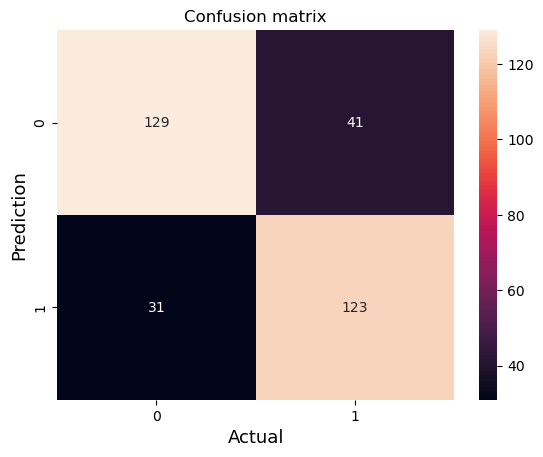

In [18]:
model(bacteria)

In [19]:
#bacteria='Staphylococcus aureus'
#bacteria='Methicillin-Resistant Staphylococcus aureus'
#bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
bacteria='Salmonella typhimurium'
#bacteria='Klebsiella pneumoniae'

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        70
           1       0.87      0.72      0.79        94

    accuracy                           0.78       164
   macro avg       0.78      0.79      0.78       164
weighted avg       0.80      0.78      0.78       164



SVC(C=10, gamma=0.5)

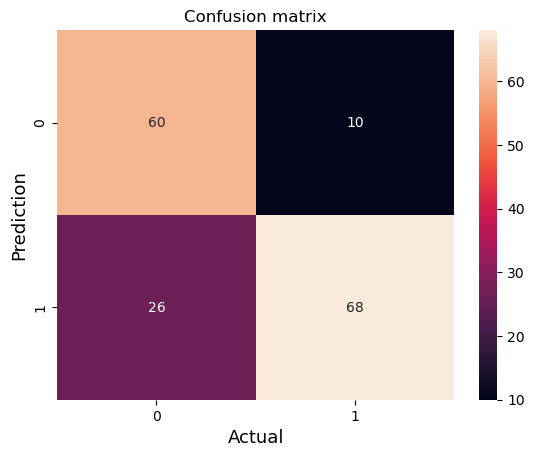

In [20]:
model(bacteria)

In [25]:
#bacteria='Staphylococcus aureus'
#bacteria='Methicillin-Resistant Staphylococcus aureus'
#bacteria='Bacillus subtilis'
#bacteria='Escherichia coli'
#bacteria='Salmonella typhimurium'
bacteria='Klebsiella pneumoniae'

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 20, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.70      0.75      0.72        73
           1       0.73      0.67      0.70        73

    accuracy                           0.71       146
   macro avg       0.71      0.71      0.71       146
weighted avg       0.71      0.71      0.71       146



SVC(C=20, gamma=1)

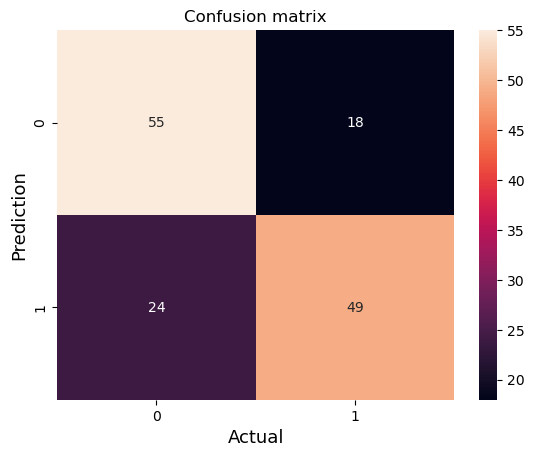

In [26]:
model(bacteria)